# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [3]:
dataset = pd.read_csv('sms_spam.txt', delimiter = '\t', quoting = 3) #    Ignoring " with quoting = 3

In [4]:
dataset.head()

,type,text
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."


In [5]:
dataset.columns

Index(['type', 'text'], dtype='object')

# Encoding "Ham" & "Spam" to Binary Form

In [5]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
dataset["type"] = lab.fit_transform(dataset["type"])
dataset.head()

,type,text
0,0,"""Go until jurong point, crazy.. Available only..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"""Nah I don't think he goes to usf, he lives ar..."


In [16]:
dataset.shape

(5574, 2)

# Cleaning the emails as txt

In [6]:
import re 
import nltk
#   nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 5574):
    feedback = re.sub('[^a-zA-Z]', ' ', dataset['text'][i]) #   Keeping texts only
    feedback = feedback.lower() #   All Lowercase
    feedback = feedback.split() #   Creating list of review words
    ps = PorterStemmer()
    # Remove stopwords & Stemming (Keeping root word only )
    feedback = [ps.stem(word) for word in feedback if not word in set(stopwords.words('english'))]
    feedback = ' '.join(feedback)
    corpus.append(feedback)

In [18]:
print(corpus)

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat', 'ok lar joking wif u oni', 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s', 'u dun say so early hor u c already then say', 'nah i don t think he goes to usf he lives around here though', 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv', 'even my brother is not like to speak with me they treat me like aids patent', 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune', 'winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only', 'had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call the mobil

# Bag of Words Model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Keeping only frequent 1500 words from corpus
cv = CountVectorizer(max_features = 1500) 
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 0].values


In [22]:
print(y)

[0 0 1 ... 0 0 0]


#    Spliting training and testing set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# 1. Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_hat = classifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_hat)
conmat

array([[946,   4],
       [ 24, 141]], dtype=int64)

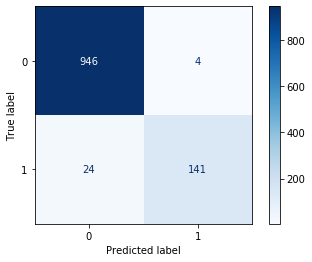

In [11]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues', values_format='.3g')

In [12]:
print (classifier.score(X_test, y_test))

0.9748878923766816


In [13]:
from sklearn.model_selection import cross_val_score
accus = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
accus.mean()
#accus.std()

0.9818350419994666